# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/data/bhmclr_drg.xlsx', sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data[['IP Cash Price','IP Charge']].hist(bins=20, range=[0,40000])

### Question:

**What do you observe from the histograms above?**

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

In [ ]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

In [ ]:
data.plot.scatter(x='IP Cash Price', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [1]:
# Your code here to load data...
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/data/indian_liver_patient.csv')

In [2]:
# Your code here to do a first visualization...
data.shape

(583, 11)

In [3]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298c602e10>,
      dtype=object)

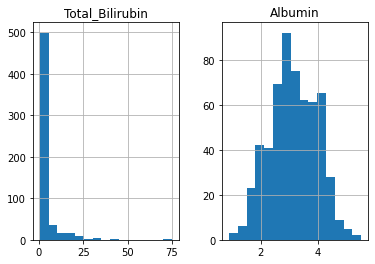

In [5]:
data[['Total_Bilirubin','Albumin']].hist(bins=15)

(0.0, 30.0)

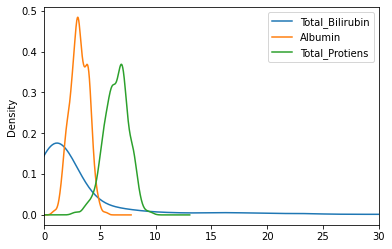

In [6]:
graph = data[['Total_Bilirubin','Albumin','Total_Protiens']].plot.kde()
graph.set_xlim(0, 30)

In [7]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [8]:
data.groupby(['Gender'])['Total_Protiens'].count()

Gender
Female    142
Male      441
Name: Total_Protiens, dtype: int64

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Total_Protiens, dtype: object

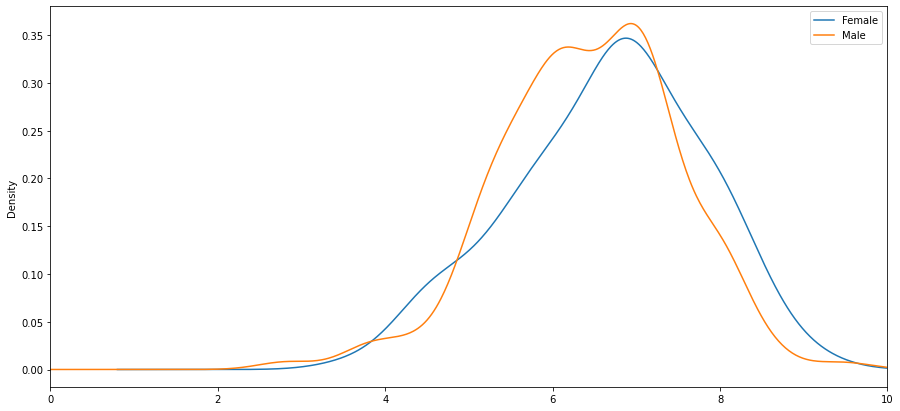

In [9]:
data.groupby(['Gender'])['Total_Protiens'].plot.kde(
    xlim=(0,10),
    legend=True,
    figsize=(15,7)
)

### Observations #1

# Total bilirubin data is skewed to the left and albumin data is normally distributed
# The average albumin is around 2.5 while the average total protien is around 7.5
# Average total protien is little higher for male than female this may be because of we have much more male in the data than female

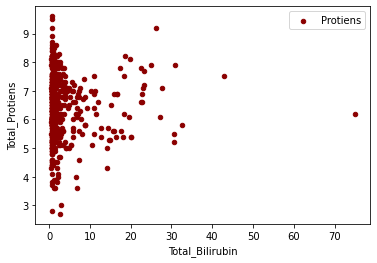

In [10]:
# More code here to do a second visualization...
data.plot.scatter(x='Total_Bilirubin', y='Total_Protiens', color='DarkRed', label='Protiens')

<Figure size 1224x792 with 0 Axes>

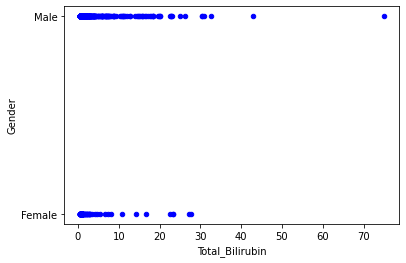

In [11]:
groups = data.groupby(['Gender'])
plt.figure(figsize=(17,11))
data.plot.scatter(x='Total_Bilirubin',y='Gender',color='blue')



### Observations #2
# Even if there are some outliers majority of the total bilirubin data is concentrated around one
# Male liver patients have high total bilirubin when compared to female liver patients


---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [12]:
%%bash
git pull
git add week09_assignment_2.ipynb
git commit -a -m "Submitting the week 9 programming assignment"
git push

Already up to date.
[main 2f0dfb6] Submitting the week 9 programming assignment
 1 file changed, 472 insertions(+)
 create mode 100644 week09/week09_assignment_2.ipynb


To github.com:gezishu2020/hds5210-2021.git
   e540abb..2f0dfb6  main -> main



---

If the message above says something like _Submitting the week 8 programming assignment_ or _Everything is up to date_, then your work was submitted correctly.